In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split


%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['Kaiti']
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
df = pd.read_csv('air_data - utf8.csv')
df.info()

In [4]:
# 缺失值处理
    # 连续
    # 离散
    # 填充：5%删除、<15% 填充
    # 平均值、中位数、众数

In [5]:
# 导入数据
df = df[['MEMBER_NO','FFP_DATE','FLIGHT_COUNT','SEG_KM_SUM','SUM_YR_1','SUM_YR_2','AVG_INTERVAL','MAX_INTERVAL','avg_discount']]

In [ ]:
# 可视化缺失值的包
import missingno as mn

# 使用
mn.matrix(df)

In [7]:
# 用均值填补
df['SUM_YR_1'].fillna(df['SUM_YR_1'].mean(), inplace=True)
df['SUM_YR_2'].fillna(df['SUM_YR_2'].mean(), inplace=True)

In [12]:
# 用户会员号， 入会时间、飞行次数、里程数、第一年票价、第二年票价、出行次数、折扣率
""" 'MEMBER_NO': '会员卡号',
    'FFP_DATE': '入会时间',
    'FLIGHT_COUNT': '观测窗口内飞行次数',
    'SUM_YR_1': '第一年总票价',
    'SUM_YR_2': '第二年总票价',
    'SEG_KM_SUM': '观测窗口的总飞行公里数',
    'MAX_INTERVAL': '最大时间间隔',
    'AVG_INTERVAL': '平均时间间隔',
    'avg_discount': '平均折扣率'
"""
# 查看数据统计信息，判断是否有异常值，最小值小于0等，
df.describe()

# 查看各分位数
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.99])

,MEMBER_NO,FLIGHT_COUNT,SEG_KM_SUM,SUM_YR_1,SUM_YR_2,AVG_INTERVAL,MAX_INTERVAL,avg_discount
count,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000
mean,31494.500000,11.839414,17123.878691,5355.376064,5604.026014,67.749788,166.033895,0.721558
std,18183.213715,14.049471,20960.844623,8073.902161,8693.824796,77.517866,123.397180,0.185427
min,1.000000,2.000000,368.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,6299.700000,2.000000,2727.000000,0.000000,0.000000,9.729730,18.000000,0.508989
25%,15747.750000,3.000000,4747.000000,1020.000000,785.000000,23.370370,79.000000,0.611997
50%,31494.500000,7.000000,9994.000000,2844.000000,2784.000000,44.666667,143.000000,0.711856
75%,47241.250000,15.000000,21271.250000,6524.250000,6826.250000,82.000000,228.000000,0.809476
99%,62358.130000,69.000000,100841.280000,37858.470000,41179.730000,412.000000,551.000000,1.410000
max,62988.000000,213.000000,580717.000000,239560.000000,234188.000000,728.000000,728.000000,1.500000


<AxesSubplot:>

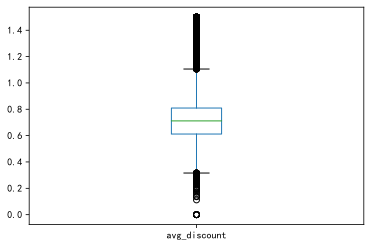

In [14]:
# 查看折扣率的箱线图
df['avg_discount'].plot(kind='box')

In [16]:
# 格式化入会时间：距离现在（观测窗口时间结束日期）多久
    # 将计算时间天数新存一个列
df['入会时间'] = (pd.to_datetime('2014-03-31') - pd.to_datetime(df['FFP_DATE'])).dt.days

In [19]:
df['平均每公里票价'] = (df['SUM_YR_1']+df['SUM_YR_2']) / df['SEG_KM_SUM']

In [20]:
df['时间间隔差值'] = df['MAX_INTERVAL'] - df['AVG_INTERVAL']

In [21]:
# 聚类数据

X = df[['入会时间', 'FLIGHT_COUNT', '平均每公里票价', 'SEG_KM_SUM', '时间间隔差值', 'avg_discount']]

In [23]:
# 对数据进行标准化

from sklearn.preprocessing import StandardScaler   # 标准化
from sklearn.preprocessing import MinMaxScaler     # 0-1标准化

std = StandardScaler().fit(X)
X_ = std.transform(X)


In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ss = []
for i in range(3,8):
    K = KMeans(n_clusters= i).fit(X_)
    ss.append(silhouette_score(X_, K.labels_)) 
    # K.labels_: 返回每个数据是在哪一个质心,标签
    # k.predict(x): 返回新数据的预测

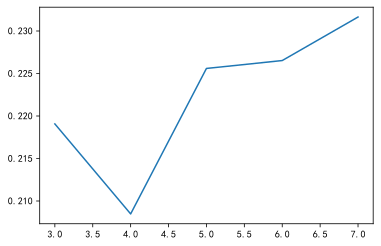

In [27]:
plt.plot(range(3,8),ss)
plt.show()

D:\Software\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


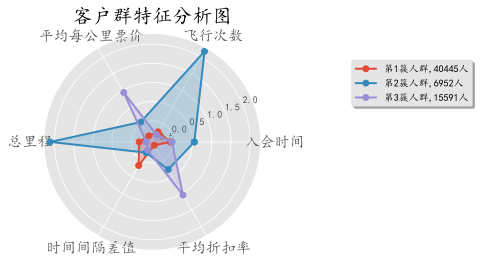

D:\Software\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


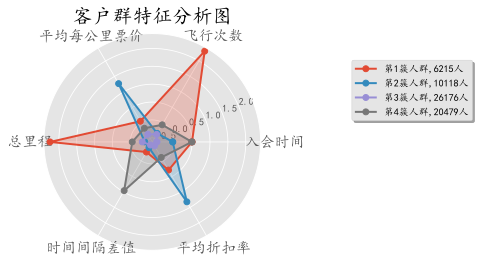

D:\Software\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


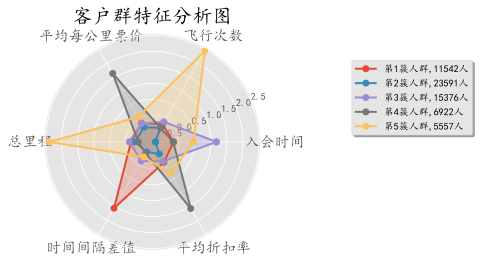

D:\Software\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


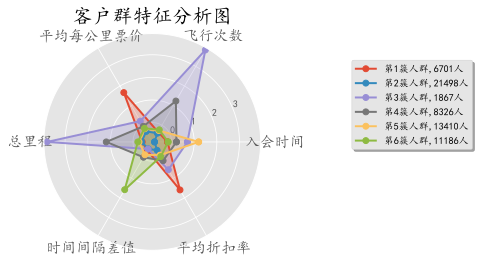

D:\Software\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


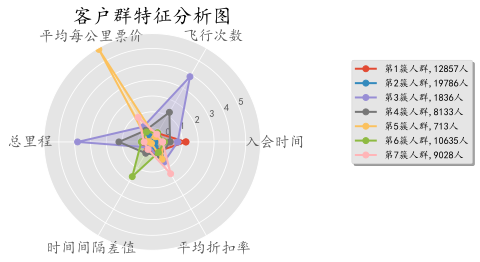

D:\Software\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


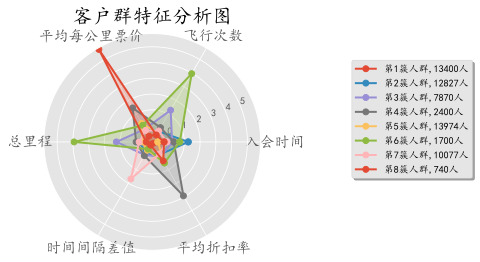

In [37]:
# 作雷达图

S_data =pd.DataFrame(X_)


# 使用ggplot的绘图风格
plt.style.use('ggplot')

for i in range(3,9,1):
    
    # 聚类
    kmodel = KMeans(n_clusters=i, n_jobs=4)
    kmodel.fit(S_data)
    
    # 简单打印结果
    r1 = pd.Series(kmodel.labels_).value_counts() #统计各个类别的数目
    r2 = pd.DataFrame(kmodel.cluster_centers_) #找出聚类中心
    
    # 所有簇中心坐标值中最大值和最小值
    max = r2.values.max()
    min = r2.values.min()
    
    r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
    r.columns = list(S_data.columns) + [u'类别数目'] #重命名表头

    # 绘图
    fig=plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(111, polar=True)
    center_num = r.values
    
    feature = ["入会时间", "飞行次数", "平均每公里票价", "总里程", "时间间隔差值", "平均折扣率"]
    N =len(feature)
    
    # 自定义雷达图绘图区信息
    for i, v in enumerate(center_num):
        # 设置雷达图的角度，用于平分切开一个圆面
        angles=np.linspace(0, 2*np.pi, N, endpoint=False)
        
        # 为了使雷达图一圈封闭起来，需要下面的步骤
        center = np.concatenate((v[:-1],[v[0]]))
        angles=np.concatenate((angles,[angles[0]]))
        
        # 绘制折线图
        ax.plot(angles, center, 'o-', linewidth=2, label = "第%d簇人群,%d人"% (i+1,v[-1]))
        # 填充颜色
        ax.fill(angles, center, alpha=0.25)
        # 添加每个特征的标签
        ax.set_thetagrids(angles[:-1] * 180/np.pi, feature, fontsize=15)
        # 设置雷达图的范围
        ax.set_ylim(min-0.1, max+0.1)
        # 添加标题
        plt.title('客户群特征分析图', fontsize=20)
        # 添加网格线
        ax.grid(True)
        # 设置图例
        plt.legend(loc='best', bbox_to_anchor=(2,0.9),ncol=1, fancybox=True, shadow=True)   # bbox_to_anchor=(2,0.9)，图例位置

    # 显示图形
    plt.show()


第一簇人群，9991人，最大的特点是时间间隔差值最大，分析可能是“季节型客户”，一年中在某个时间段需要多次乘坐飞机进行旅行，其他的时间则出行的不多，这类客户我们需要在保持的前提下，进行一定的发展；
第二簇人群，3157人，最大的特点就是平均每公里票价和平均折扣率都是最高的，应该是属于乘坐高等舱的商务人员，应该重点保持的对象，也是需要重点发展的对象，另外应该积极采取相关的优惠政策是他们的乘坐次数增加，有钱人；
第三簇人群，16245人，入会时间较短，每公里票价和平均折扣率属于较高的 属于新用户
第四簇人群，5221人， 总里程和飞行次数都是最多的，而且平均每公里票价也较高，是重点保持对象
第五簇人群，14357人，最大的特点就是入会的时间较长，属于老客户按理说平均折扣率应该较高才对，但是观察窗口的平均折扣率较低，而且总里程和总次数都不高，分析可能是流失的客户；
第六簇人群，14027人，各方面的数据都是比较低的，属于一般或低价值用户